<a href="https://colab.research.google.com/github/YeojinKim03/AI-study/blob/master/220804_AI_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Flatten

import time

#MNIST

##데이터 다운로드

In [3]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
np.set_printoptions(linewidth=4*29) #영상 데이터는 그냥 숫자다
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

5


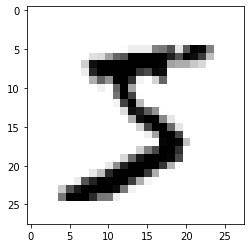

In [6]:
plt.imshow(raw_train_x[0], cmap=plt.cm.binary) #cmap=plt.cm.binary (흑백으로 그려라), cmap='gray'해도  
print(raw_train_y[0])

5


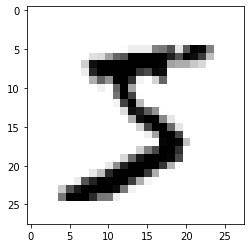

0


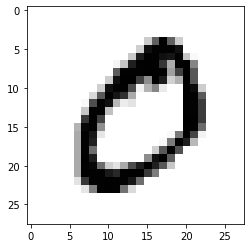

4


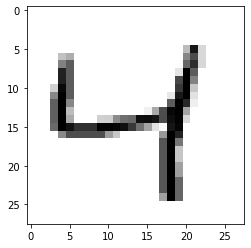

1


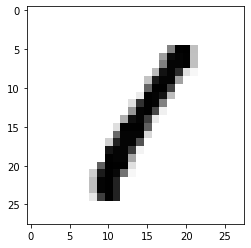

In [7]:
for i in range(4): #데이터 출력해봄
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()


##Normalization

In [8]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))

255
255
1.0
1.0


In [9]:
train_x = train_x.reshape((60000, 28*28)) #reshape함
test_x = test_x.reshape((10000, 28*28))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


##모델 준비

In [10]:
model = keras.Sequential()
# model.add(Input(4)) 아이리스 코드였음 4개 입력
model.add(Input(28*28)) #28x28의 크기를 입력
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation='softmax')) 아이리스 코드였음 3개의 카테고리
model.add(Dense(10, activation='softmax')) #10개의 카테고리

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9123 - accuracy: 0.7173
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.9023
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.9201
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.9273
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2389 - accuracy: 0.9313


In [12]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2387 - accuracy: 0.9300
loss= 0.23865188658237457
acc= 0.9300000071525574


[[3.1700962e-05 3.2236403e-07 1.1523599e-04 ... 9.9370438e-01 3.0985473e-06 9.9494040e-04]
 [1.2755631e-02 1.6126172e-04 9.1636515e-01 ... 8.0839025e-16 1.3749501e-04 1.7671986e-12]
 [1.2755314e-06 9.7483194e-01 1.2807509e-02 ... 2.7228859e-03 3.9149309e-03 5.3239544e-04]
 ...
 [3.0145249e-09 2.3668318e-09 1.6012443e-08 ... 1.4085496e-04 1.1274954e-03 1.7330183e-02]
 [8.9043906e-06 2.0772251e-05 1.3770480e-05 ... 9.8081364e-07 1.3987782e-03 2.6568047e-08]
 [3.2788230e-07 2.2238900e-11 4.9318255e-06 ... 1.2039077e-14 2.2655252e-06 3.4730161e-09]]
[7 2 1 ... 4 5 6]
7


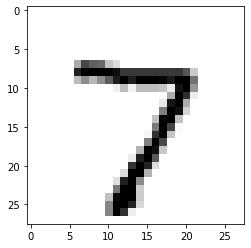

2


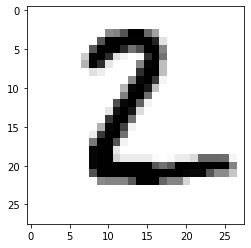

1


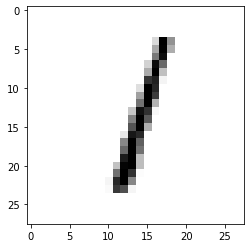

0


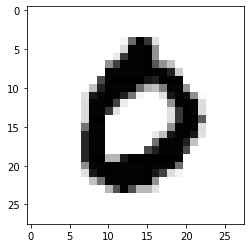

In [13]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1) 
print(predicted)

for i in range(4):
  print(predicted[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

#DNN classification Template

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Flatten

import time

#데이터 로드
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

#normalization
train_x = train_x/255.
test_x = test_x/255.

#모델 구축
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten()) #있는 그대로 28x28로 집어넣고 flatten하는 레이어를 넣으면 됨
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

#컴파일
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

#모델 예측
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

#loss
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8304 - accuracy: 0.7431
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3625 - acc

##loss 그래프 그리기

In [31]:
#history는 model fit에서 받음
history=model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128, validation_data=(test_x,test_y))

#loss = training data를 가지고 구한 것
#진짜 성능은 사용하지 않은 데이터를 가지고 판단해야
#train(학습o) valid(학습x) test (학습 후)
#train loss : loss 구하고 가중치 업뎃 꾸준히, 전체적인 train loss는 전체 train loss의 평균
#validation loss : 한 epoch 끝나면 validation loss 구하는 것, 보통 train loss보다 높음



Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1387 - accuracy: 0.9580 - val_loss: 0.2219 - val_accuracy: 0.9422
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1388 - accuracy: 0.9578 - val_loss: 0.2273 - val_accuracy: 0.9409
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1377 - accuracy: 0.9586 - val_loss: 0.2250 - val_accuracy: 0.9423
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1370 - accuracy: 0.9581 - val_loss: 0.2236 - val_accuracy: 0.9401
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1375 - accuracy: 0.9582 - val_loss: 0.2279 - val_accuracy: 0.9398


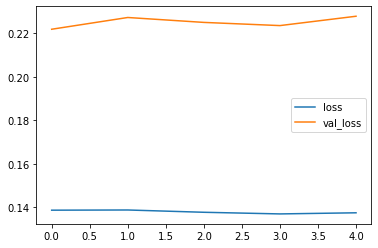

In [32]:
plt.plot(history.history['loss'], label='loss') #history.history는 과거 이력 보여줌 
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend() 

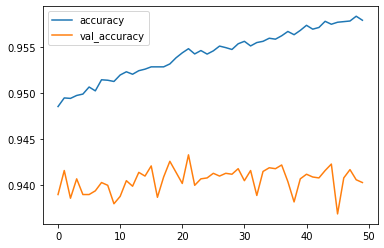

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend()

#CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1))) # ADDED
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED #영상을 그냥 2D라고 하는 것, 인풋이 3D여야 #padding='same' 사이즈가 안 줄어들게 하는 것 filter size (3,3)
#Conv2D (32, (3,3)) 에서 32는 filter개수 32개 --> 모델 summary에서 보면 (, , 마지막거)
#depth는 안해도 keras가 대신 계산해줘서 입력 필요 x

model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


cnn 보충 필요

#Cifar CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, Reshape

import time

In [2]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape) #5000개, (32,32,3)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


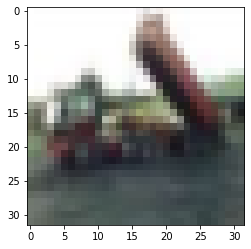

4 deer


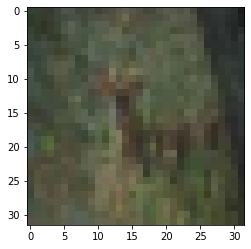

7 horse


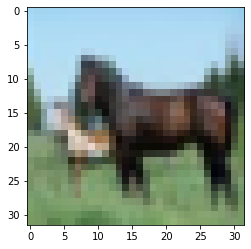

9 truck


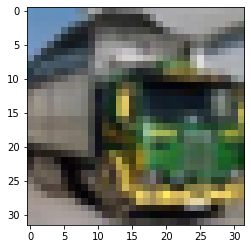

In [3]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [12]:
model = keras.Sequential()
# model.add(Input((28,28)))
# model.add(Reshape((28,28,1)))
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3), padding='same')) #영상을 그냥 2D라고 하는 것, 인풋이 3D여야
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


history=model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=128, validation_split=0.1)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

313/313 [==============================] - 1s 3ms/step - loss: 1.4771 - accuracy: 0.6100
loss= 1.4771499633789062
acc= 0.6100000143051147
[3 1 0 ... 5 1 7]


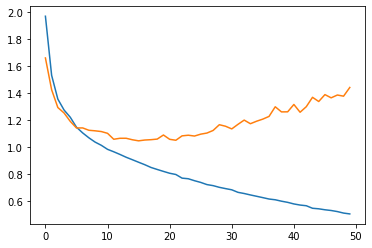

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

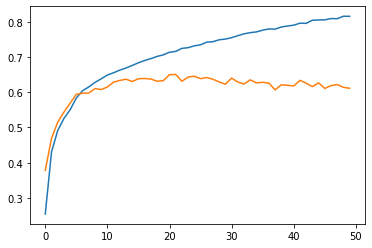

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

성능 개선

*   오버피팅 처리
*   결측치, 이상치 처리

모델 구조는 안바꾸나요? --> 거의 안 건드림
<br>
이유 : 특정 작업에 잘 동작하는 모델이 이미 존재되어 있어서

#GPU
따로 명시하지 않아도 디폴트로 GPU사용함, 명시적으로도 가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

##리스트 보기

In [ ]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

##NVIDIA GPU 상태보기

In [ ]:
!nvidia-smi

## GPU 설정

다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

In [ ]:
with tf.device('/device:GPU:0'): # ADDED 명시 가능

  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=32)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

#오버피팅 처리


#모듈 임포팅

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

##데이터 준비

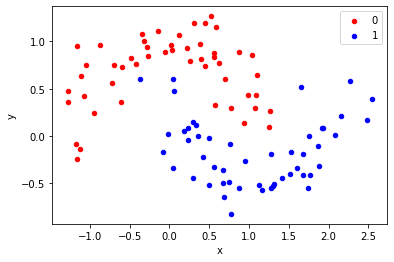

In [4]:
from sklearn.datasets import make_moons #sklearn 라이브러리에서 달 데이터 가져옴


# 데이터 생성
x, y = make_moons(n_samples=100, noise=0.2, random_state=32) #노이즈를 섞어서 퍼트려놓음, random_state : 랜덤 시드값 정해줌(1번 랜덤, 2번랜덤 등등)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

##아무 처리 안했을 때

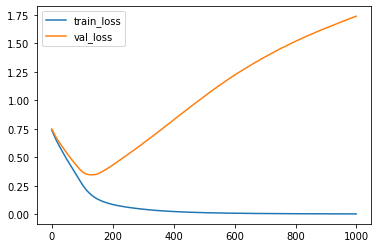

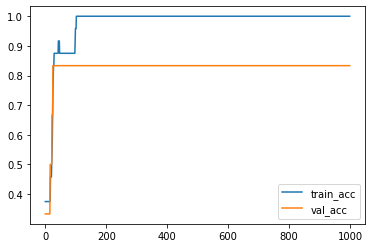

In [5]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["acc"])

base_history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(base_history.history['acc'], label='train_acc')
plt.plot(base_history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()


##Drop Out

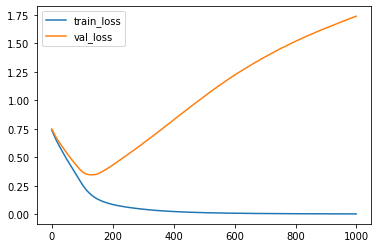

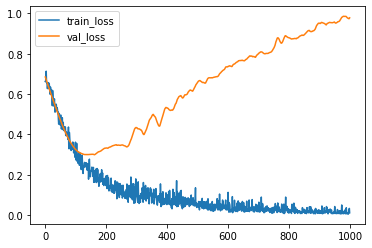

In [6]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu')) 
model.add(Dropout(0.2)) # ADDED #노드 20개 0.2의확률로 0으로 만들어버림, DNN이 외우는걸 방지함
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#Batch Normalization

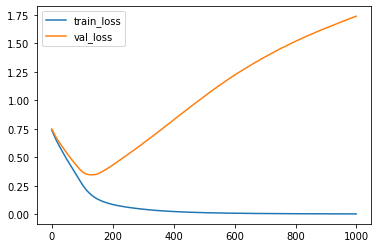

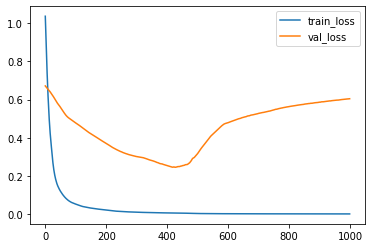

In [9]:
from tensorflow.keras.layers import BatchNormalization

#오버피팅 발생 원인 - 퍼셉트론의 값이 너무 크거나 작아서 --> 레이어의 출력값을 정규화시켜서(wx+b 중에 x 조정) 다음 인풋에 넣어줌

model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#Regularization
Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.


- l1()
- l1_l2()
- l2()

In [ ]:
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input(2))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu', kernel_regularizer=l2())) #wx+b 중에서 w를 조정하는 것 # 제곱해서 루트한 게 1보다 작도록 조정하는 것
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#noise 추가

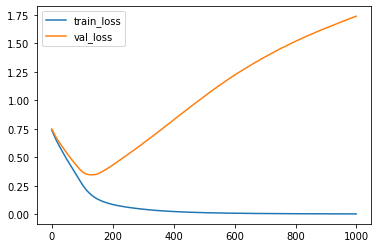

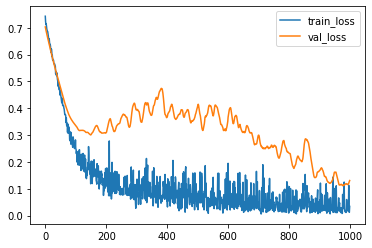

In [10]:
from tensorflow.keras.layers import GaussianNoise

model = Sequential()
model.add(Input(2))
model.add(GaussianNoise(0.1))   # ADDED # 데이터에 노이즈를 넣어줌
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 전부 다 실시

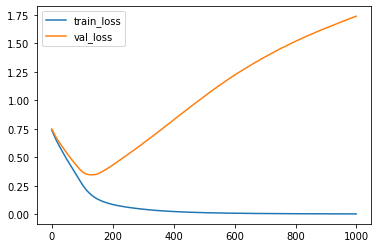

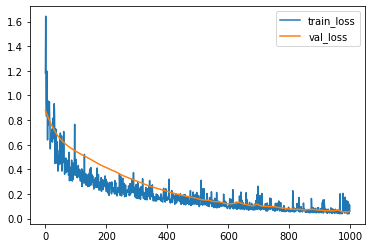

In [11]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input(2))
model.add(GaussianNoise(0.1))   # ADDED
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

#모델 크기 줄이기

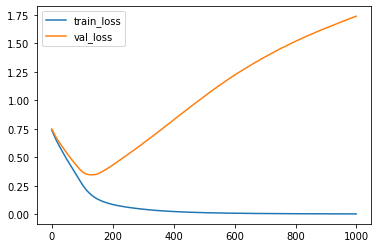

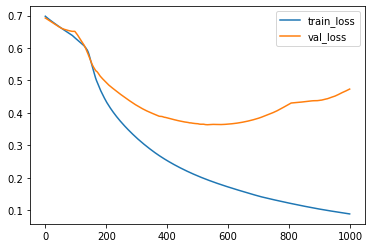

In [12]:
model = Sequential()
model.add(Input(2))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


#데이터를 10배로

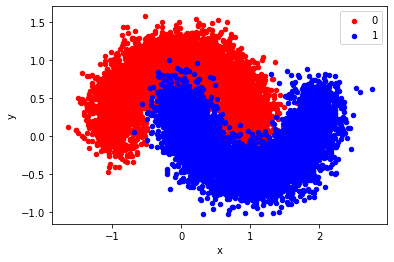

In [15]:
from sklearn.datasets import make_moons


# 데이터 생성
# x, y = make_moons(n_samples=100, noise=0.2, random_state=32)
x, y = make_moons(n_samples=100*100, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

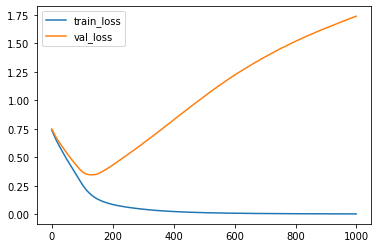

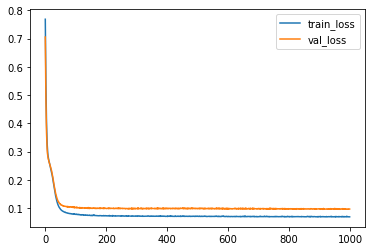

In [16]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
